In [19]:
library(survival)
library(survminer)
library(tidyverse)
library(dplyr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  1.4.2     ✔ purrr   0.2.4
✔ tidyr   0.8.0     ✔ stringr 1.3.0
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::extract()   masks magrittr::extract()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::lag()       masks stats::lag()
✖ purrr::set_names() masks magrittr::set_names()


In [30]:
pth <- '../data/TARGET-osteo-TH-assignment-survival.tsv'

surv <- read.table(pth,
                  sep='\t',
                  header=T)

surv <- surv[which(surv$cluster < 2), ]

surv <- dplyr::as_tibble(surv)

In [31]:
surv

,X,OS,vital,EFS,event,cluster
,<fct>,<dbl>,<int>,<dbl>,<int>,<dbl>
1,TARGET-40-0A4HMC-01A-01R,377,0,377,0,1
2,TARGET-40-0A4HX8-01A-01R,1750,0,3050,0,0
3,TARGET-40-0A4HXS-01A-01R,2948,0,2948,0,1
4,TARGET-40-0A4HY5-01A-01R,290,1,218,1,0
5,TARGET-40-0A4I0Q-01A-01R,519,1,519,1,0
6,TARGET-40-0A4I0W-01A-01R,683,0,683,0,0
7,TARGET-40-0A4I3S-01A-01R,1844,0,1844,0,0
8,TARGET-40-0A4I42-01A-01R,619,1,351,1,0
9,TARGET-40-0A4I48-01A-01R,1616,0,1616,0,1


Saving 6.67 x 6.67 in image


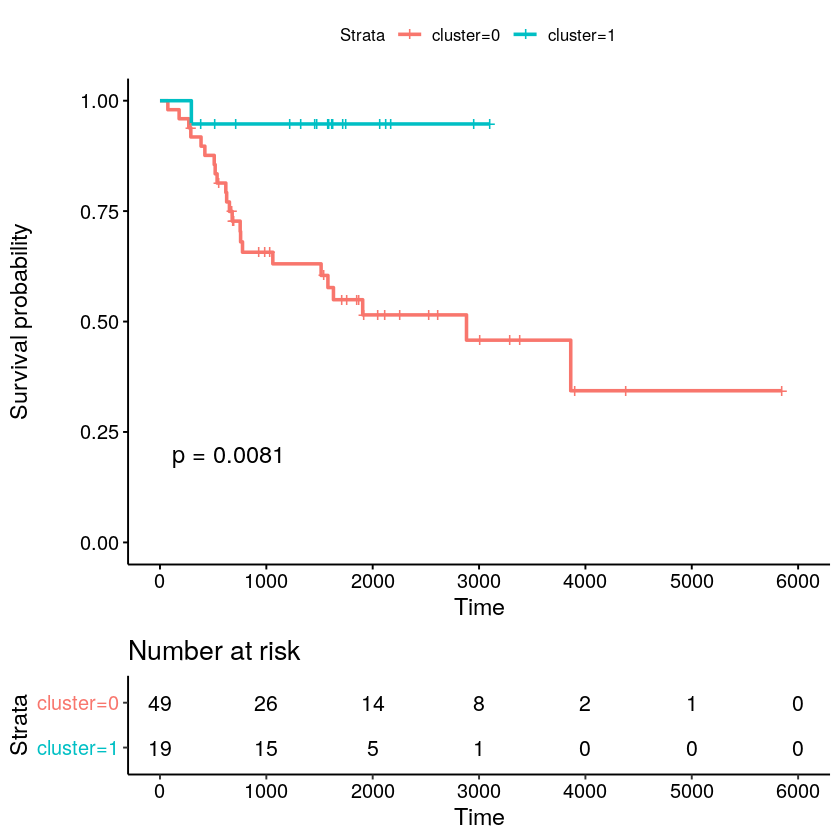

In [33]:
fit <- survfit(Surv(OS, vital) ~ cluster, data=surv)
g <- ggsurvplot(fit, conf.int=F, pval=T, risk.table=TRUE)
ggsave( "../img/TARGET-osteo-cluster-OS-survival.png", 
       print(g), 
       dpi = 1000 )
g

Saving 6.67 x 6.67 in image


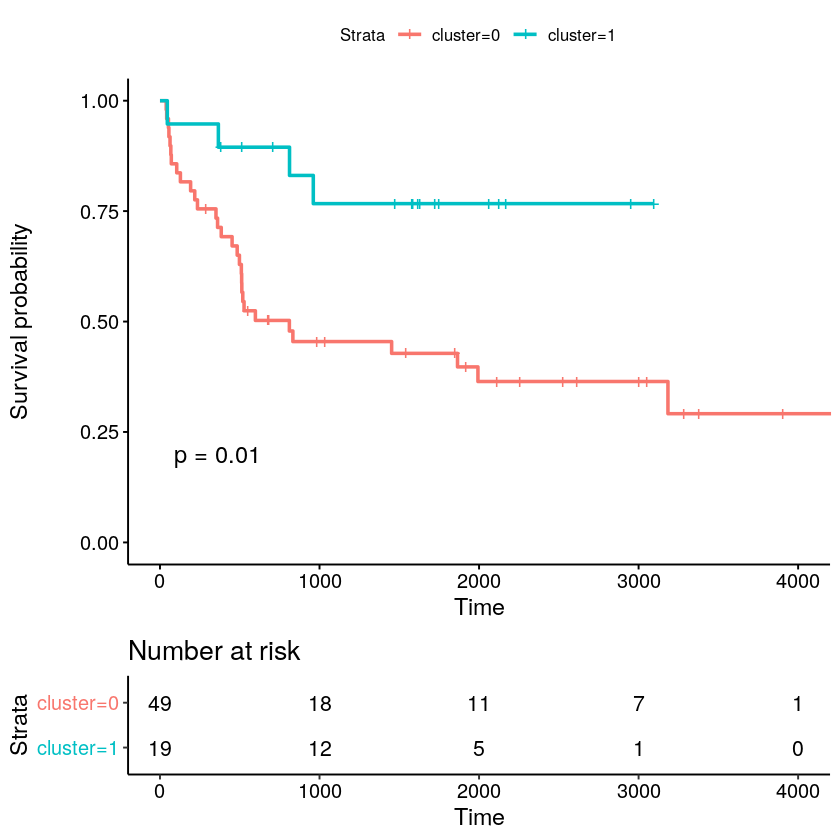

In [34]:
fit <- survfit(Surv(EFS, event) ~ cluster, data=surv)
g <- ggsurvplot(fit, conf.int=F, pval=T, risk.table=TRUE)
ggsave( "../img/TARGET-osteo-cluster-OS-survival.png", 
       print(g), 
       dpi = 1000 )
g